In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_csv('../MyPython/dataset/vida.csv')
print(df.shape)
df.head()

(50, 9)


,habitantes,ingresos,analfabetismo,esp_vida,asesinatos,universitarios,heladas,area,densidad_pobl
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,71.290526
1,365,6315,1.5,69.31,11.3,66.7,152,566432,0.644384
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,19.503249
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,40.619886
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,135.570890


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   habitantes      50 non-null     int64  
 1   ingresos        50 non-null     int64  
 2   analfabetismo   50 non-null     float64
 3   esp_vida        50 non-null     float64
 4   asesinatos      50 non-null     float64
 5   universitarios  50 non-null     float64
 6   heladas         50 non-null     int64  
 7   area            50 non-null     int64  
 8   densidad_pobl   50 non-null     float64
dtypes: float64(5), int64(4)
memory usage: 3.6 KB


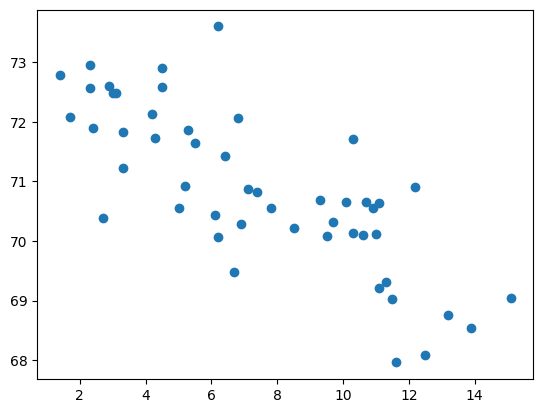

In [18]:
plt.scatter(x=df['asesinatos'], y=df['esp_vida'])

In [19]:
df.corr()

,habitantes,ingresos,analfabetismo,esp_vida,asesinatos,universitarios,heladas,area,densidad_pobl
habitantes,1.000000,0.208228,0.107622,-0.068052,0.343643,-0.098490,-0.332152,0.022544,0.246228
ingresos,0.208228,1.000000,-0.437075,0.340255,-0.230078,0.619932,0.226282,0.363315,0.329968
analfabetismo,0.107622,-0.437075,1.000000,-0.588478,0.702975,-0.657189,-0.671947,0.077261,0.009274
esp_vida,-0.068052,0.340255,-0.588478,1.000000,-0.780846,0.582216,0.262068,-0.107332,0.091062
asesinatos,0.343643,-0.230078,0.702975,-0.780846,1.000000,-0.487971,-0.538883,0.228390,-0.185035
universitarios,-0.098490,0.619932,-0.657189,0.582216,-0.487971,1.000000,0.366780,0.333542,-0.088367
heladas,-0.332152,0.226282,-0.671947,0.262068,-0.538883,0.366780,1.000000,0.059229,0.002277
area,0.022544,0.363315,0.077261,-0.107332,0.228390,0.333542,0.059229,1.000000,-0.341389
densidad_pobl,0.246228,0.329968,0.009274,0.091062,-0.185035,-0.088367,0.002277,-0.341389,1.000000


<Axes: >

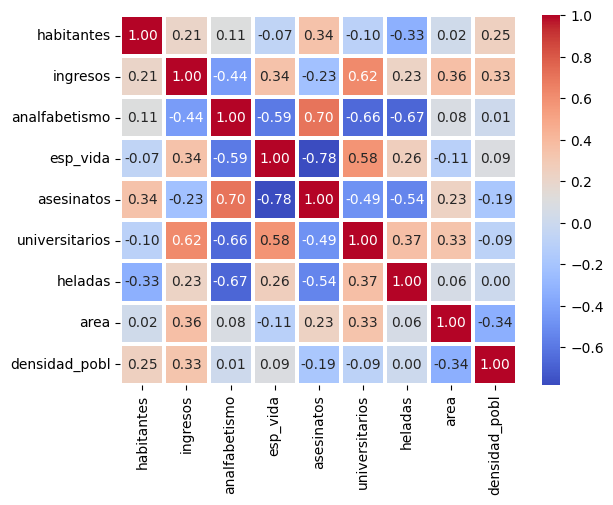

In [20]:
import seaborn as sns
#plt.figure(figsize=(3, 2))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=1.5, cmap="coolwarm")

In [30]:
from sklearn.model_selection import train_test_split as tts
x = df.drop(['esp_vida'], axis=1)
y= df['esp_vida']

X_train, X_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=0)
regresion = LinearRegression()
regresion.fit(X_train, y_train)
y_pred = regresion.predict(X_test)

print(regresion.intercept_)
print(regresion.coef_)
print(f"R2 = {regresion.score(X_train, y_train):.2%}")

69.48209279419265
[ 8.63076746e-05  1.77981685e-04  1.39437702e-01 -2.81582239e-01
  5.08069318e-02 -2.62263936e-03 -1.47779550e-06 -1.29726020e-03]
R2 = 75.71%


In [31]:
import statsmodels.formula.api as smf
data = pd.DataFrame()
data = pd.DataFrame(X_train)
data['esp_vida'] = pd.DataFrame(y_train)
regre = smf.ols(formula='esp_vida ~ habitantes + ingresos + analfabetismo + asesinatos + universitarios + heladas + area + densidad_pobl', data=df)
regre = regre.fit()
regre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               esp_vida   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     15.38
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           3.79e-10
Time:                        09:29:35   Log-Likelihood:                -50.500
No. Observations:                  50   AIC:                             119.0
Df Residuals:                      41   BIC:                             136.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         69.9506      1.843     37.956      0.000      66.229      73.673
habitantes       6.48e-05      3e-05      2.159      0.037    4.19e-06       0.000
ingresos           0.0003      0.000      0.875      0.387      -0.000       0.001
analfabetismo      0.3029      0.402      0.753      0.456      -0.510       1.115
asesinatos        -0.3286      0.049     -6.652      0.000      -0.428      -0.229
universitarios     0.0429      0.023      1.840      0.073      -0.004       0.090
heladas           -0.0046      0.003     -1.436      0.159      -0.011       0.002
area           -1.558e-06   1.91e-06     -0.814      0.421   -5.42e-06    2.31e-06
densidad_pobl     -0.0011      0.001     -1.511      0.138      -0.003       0.000
==============================================================================
Omnibus:                        2.847   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.241   Jarque-Bera (JB):                1.716
Skew:                          -0.190   Prob(JB):                        0.424
Kurtosis:                       2.176   Cond. No.                     1.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""